In [1]:
import pandas as pd
game = pd.read_csv('Video_Games(정제2).csv')
game.head()

,Name,Platform,Year,Genre,Publisher,NA_,EU_,JP_,Other_,Global_,C_Score,U_Score,Rating
0,SuperMarioWorld,SNES,1990,Platform,Nintendo,38.73,11.36,10.73,1.67,62.45,100.0,NaN,NaN
1,TheLegendofZelda:OcarinaofTime,N64,1998,Action,Nintendo,16.40,7.56,5.80,0.64,30.40,99.0,NaN,NaN
2,GrandTheftAutoIV,X360,2008,Action,Take-Two Interactive,45.07,20.47,0.93,6.87,73.40,98.0,7.9,M
3,GrandTheftAutoIV,PS3,2008,Action,Take-Two Interactive,31.73,24.60,2.93,10.73,70.00,98.0,7.5,M
4,TonyHawk'sProSkater2,PS,2000,Sports,Activision,13.26,6.13,0.09,0.87,20.35,98.0,7.7,T


In [6]:
# 패키지 임포트 
from sklearn.model_selection import train_test_split
# 독립변수와 종속변수 지정
X = game[['Genre','C_Score']]
y = game['Global_']

In [7]:
# 장르(범주형변수) 원핫인코딩
# 겟더미함수
X_encoded = pd.get_dummies(X, columns=['Genre'])

In [10]:
# 훈련 데이터와 테스트 데이터 분할, 시드값42
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)
# 훈련 데이터와 검증 데이터 분할, 시드값42
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [11]:
# 각 데이터셋의 크기 확인하기
print("훈련 데이터 크기:", X_train.shape[0])
print("검증 데이터 크기:", X_val.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])

훈련 데이터 크기: 13539
검증 데이터 크기: 1505
테스트 데이터 크기: 1672


In [16]:
# 모델패키지 임포트
from sklearn.linear_model import LinearRegression
# 선형회귀모델 생성하기
model = LinearRegression()
# 학습데이터로 모델 훈련
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# 모델평가패키지 임포트
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 학습된 모델로 예측하기
y_pred = model.predict(X_val)
# 평가 지표 계산
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
# 평가 결과 출력
print("평균 제곱 오차 (MSE):", mse)
print("평균 절대 오차 (MAE):", mae)
print("R-squared 점수:", r2)

평균 제곱 오차 (MSE): 76.94491605413295
평균 절대 오차 (MAE): 3.513649385793605
R-squared 점수: 0.04555779083916911


In [18]:
# 학습된모델로 테스트 데이터 예측하기
y_pred_test = model.predict(X_test)

# 테스트 데이터에 대한 평가 지표 계산
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# 테스트 데이터에 대한 평가 결과 출력
print("테스트 데이터 평균 제곱 오차 (MSE):", mse_test)
print("테스트 데이터 평균 절대 오차 (MAE):", mae_test)
print("테스트 데이터 R-squared 점수:", r2_test)


테스트 데이터 평균 제곱 오차 (MSE): 49.020215490370234
테스트 데이터 평균 절대 오차 (MAE): 3.6049328638662392
테스트 데이터 R-squared 점수: 0.04530523002067588


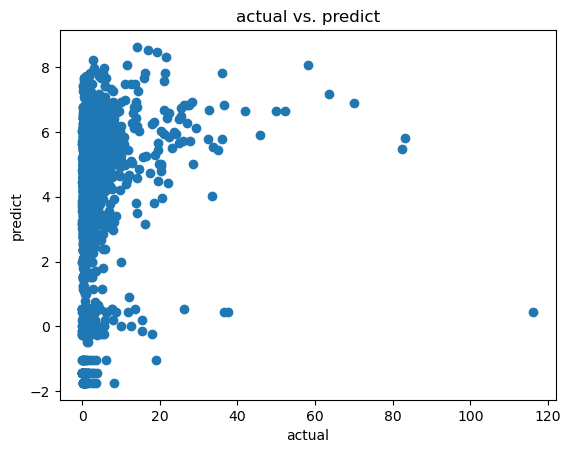

In [21]:
# 모델 평가결과 시각화해서 확인해보기..
import matplotlib.pyplot as plt

# 산점도 그래프로 실제값과 예측값 비교
plt.scatter(y_test, y_pred_test)
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('actual vs. predict')
plt.show()

C:\Users\jisu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jisu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jisu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jisu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


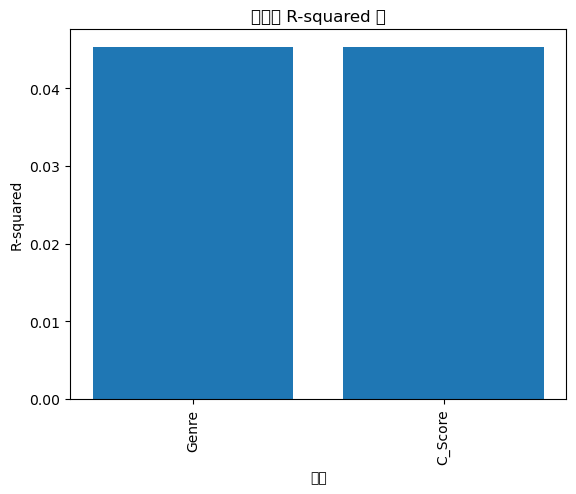

In [22]:
# 각 피처의 r2값 막대형식으로 시각화해보기
# 피처 이름과 R-squared 값 가져오기
feature_names = X.columns
r2_values = model.score(X_test, y_test)

# 막대 그래프로 피처별 R-squared 값 시각화
plt.bar(feature_names, r2_values)
plt.xlabel('피처')
plt.ylabel('R-squared')
plt.title('피처별 R-squared 값')
plt.xticks(rotation=90)
plt.show()